# Simulations Data Analysis

### Extract the simulation results

In [1]:
import pandas as pd
from data_parser import summarize_runs

In [2]:
summarize_runs()

1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0 72.0 73.0 74.0 75.0 76.0 77.0 78.0 79.0 80.0 81.0 82.0 83.0 84.0 85.0 86.0 87.0 88.0 89.0 90.0 91.0 92.0 93.0 94.0 95.0 96.0 97.0 98.0 99.0 100.0 101.0 102.0 103.0 104.0 105.0 106.0 107.0 108.0 109.0 110.0 111.0 112.0 113.0 114.0 115.0 116.0 117.0 118.0 119.0 120.0 121.0 122.0 123.0 124.0 125.0 126.0 127.0 128.0 129.0 130.0 131.0 132.0 133.0 134.0 135.0 136.0 137.0 138.0 139.0 140.0 141.0 142.0 143.0 144.0 145.0 146.0 147.0 148.0 149.0 150.0 151.0 152.0 153.0 154.0 155.0 156.0 157.0 158.0 159.0 160.0 161.0 162.0 163.0 164.0 165.0 166.0 167.0 168.0 169.0 170.0 171.0 172.0 173.0 174.0 175.0 176.0 177.0 178.0 179.0 180.0 181.0 182.0 183.0 184.0 185.

In [3]:
df = pd.read_csv('../processed_data/phase1_sim_sum.csv')

In [14]:
df

,run_no,avg_susceptibility,avg_recovery_time,initial_population,initial_infected,average_death_rate,average_recovery_rate,quarantine_delay,mass_testing_intensity,social_distancing_intensity,lockdown_intensity,final_pop,day_max_infected,day_max_infetion,total_recovered,total_deaths,total_quarantined,max_infected,max_variance,max_mean
0,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,0.0,1931.0,36.0,25.0,1930.0,3069.0,0.0,10.0,1.402448,2.333333
1,2.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,80.0,2292.0,65.0,43.0,1541.0,2708.0,0.0,15.0,1.541253,2.077263
2,3.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,90.0,3750.0,65.0,52.0,668.0,1250.0,0.0,14.0,1.797459,2.101695
3,4.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,100.0,4812.0,12.0,10.0,123.0,188.0,0.0,13.0,1.838972,2.181818
4,5.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,70.0,0.0,4270.0,65.0,65.0,325.0,730.0,0.0,9.0,1.501711,2.210526
5,6.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,70.0,80.0,4797.0,49.0,19.0,117.0,203.0,0.0,6.0,1.300094,2.227273
6,7.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,70.0,90.0,4822.0,44.0,21.0,114.0,178.0,0.0,8.0,1.847733,3.000000
7,8.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,70.0,100.0,4776.0,60.0,29.0,117.0,224.0,0.0,9.0,1.609974,2.160494
8,9.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,80.0,0.0,4810.0,65.0,51.0,98.0,190.0,0.0,7.0,1.464293,2.281250
9,10.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,80.0,80.0,4810.0,64.0,30.0,104.0,190.0,0.0,7.0,1.549193,2.073171


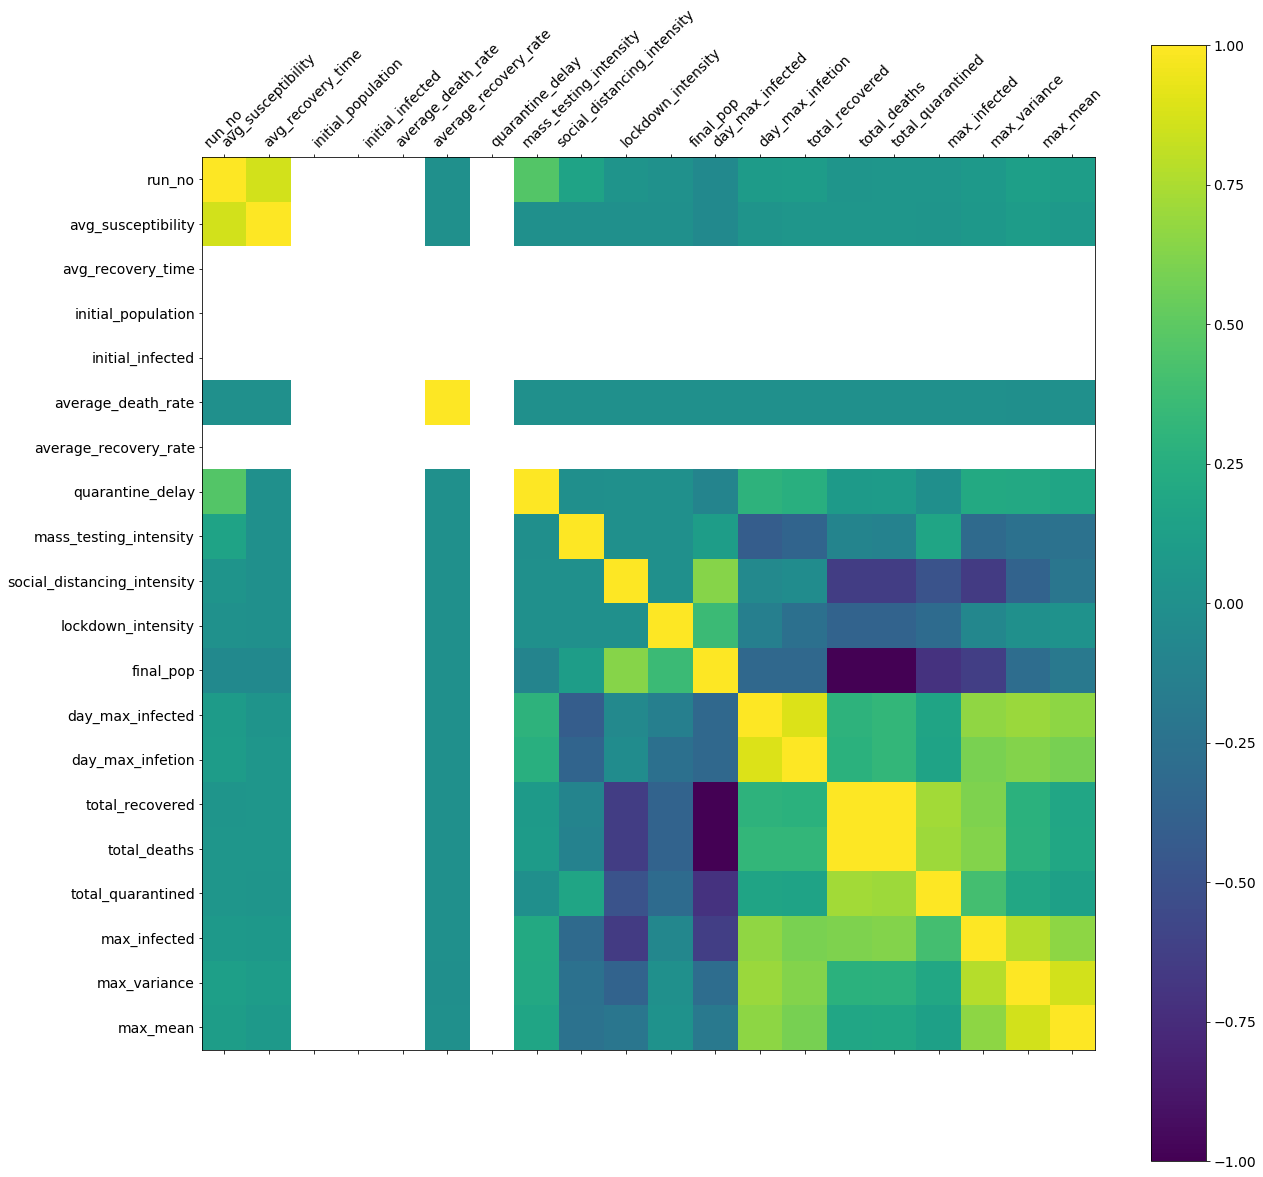

In [23]:
f = plt.figure(figsize=(20, 20))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)


# Function Dev --------------------------------------------------------------------------

In [143]:
metrics_df = pd.read_csv('../raw_data/phase1_results.csv',header = None,skiprows = 6, nrows = 11, usecols =[0,1])
metrics_df.columns = (['metric', 'value'])
metrics_df

,metric,value
0,[run number],1.0
1,average-susceptibility,60.0
2,average-recovery-time,504.0
3,initial-population,5000.0
4,initial-infected,1.0
5,average-death-rate,0.2
6,average-recovery-rate,90.0
7,quarantine-delay,1.0
8,mass-testing-intensity,0.0
9,social-distancing-intensity,0.0


In [137]:
sim_df = pd.read_csv('../raw_data/phase1_results.csv',header=0,skiprows = 24, nrows = 1564, usecols =[1 + 9,2 + 9,3 + 9,4+ 9,5+ 9,6+ 9,7+ 9,8+ 9,9+ 9])
sim_df = sim_df.reset_index()
sim_df.columns = (['hour','alive', 'uninfected', 'infected', 'recovered', 'deaths', 'quarantined', 'max_infected', 'variance_infected','mean_infected'])
sim_df = sim_df[(sim_df['hour'] % 24) == 0].reset_index(drop = True)
sim_df.index = sim_df.index.set_names(['day'])
sim_df = sim_df.reset_index()
sim_df

,day,hour,alive,uninfected,infected,recovered,deaths,quarantined,max_infected,variance_infected,mean_infected
0,0,0,5000,4999,1,0,0,0,0,0.000000,0.000000
1,1,24,5000,4999,1,0,0,0,0,0.000000,0.000000
2,2,48,4999,4995,4,0,1,0,2,0.707107,1.500000
3,3,72,4997,4992,5,0,3,0,2,0.577350,1.333333
4,4,96,4995,4976,19,0,5,0,3,0.666667,1.777778
5,5,120,4994,4954,40,0,6,0,4,0.813575,1.809524
6,6,144,4991,4925,66,0,9,0,6,1.299038,2.000000
7,7,168,4986,4878,108,0,14,0,6,1.248376,1.928571
8,8,192,4983,4823,159,1,17,0,7,1.349871,1.975000
9,9,216,4971,4738,232,1,29,0,8,1.414108,2.017241


In [131]:
#Metrics -------------------

run_no = metrics_df['value'][0]
avg_susceptibility = metrics_df['value'][1]
avg_recovery_time = metrics_df['value'][2]
initial_population = metrics_df['value'][3]
initial_infected = metrics_df['value'][4]
average_death_rate = metrics_df['value'][5]
average_recovery_rate = metrics_df['value'][6]
quarantine_delay = metrics_df['value'][7]
mass_testing_intensity = metrics_df['value'][8]
social_distancing_intensity = metrics_df['value'][9]

#Results -------------------

#final population
final_pop = min(sim_df['alive'])
#day_mostly_infected
day_max_infected = min(sim_df[sim_df['uninfected'] == min(sim_df['uninfected'])]['day'])
#day_peak_infection
day_max_infetion = min(sim_df[sim_df['infected'] == max(sim_df['infected'])]['day'])
#total recovered
total_recovered = max(sim_df['recovered'])
#total deaths
total_deaths = max(sim_df['deaths'])
#total quarantined
total_quarantined = max(sim_df['quarantined'])
#peak number infected by person
max_infected = max(sim_df['max_infected'])
#max_variance 
max_variance = max(sim_df['variance_infected'])
#max mean
max_mean = max(sim_df['mean_infected'])

In [134]:
runs_df = runs_df.append(pd.Series([run_no,
                                   avg_susceptibility, 
                                   avg_recovery_time, 
                                   initial_population, 
                                   initial_infected, 
                                   average_death_rate, 
                                   average_recovery_rate, 
                                   quarantine_delay,
                                   mass_testing_intensity,
                                   social_distancing_intensity,
                                   final_pop,
                                   day_max_infected,
                                   day_max_infetion,
                                   total_recovered,
                                   total_deaths,
                                   total_quarantined,
                                   max_infected,
                                   max_variance,
                                   max_mean], index = runs_df.columns ), ignore_index=True)

In [135]:
runs_df

,run_no,avg_susceptibility,avg_recovery_time,initial_population,initial_infected,average_death_rate,average_recovery_rate,quarantine_delay,mass_testing_intensity,social_distancing_intensity,final_pop,day_max_infected,day_max_infetion,total_recovered,total_deaths,total_quarantined,max_infected,max_variance,max_mean
0,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,1931.0,36.0,25.0,1930.0,3069.0,0.0,10.0,1.402448,2.333333
1,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,1931.0,36.0,25.0,1930.0,3069.0,0.0,10.0,1.402448,2.333333
